In [2]:
import anndata as ad
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy.stats import spearmanr
from scipy.stats import pearsonr

import seaborn as sns
import matplotlib.colors as mcolors

from bin import utils

In [3]:
fdata = ad.read_h5ad("./RNA/Multitime.clustered.h5")
cdata = ad.read_h5ad("./RNA/Multitime.guide.h5")

In [4]:
annotation = ad.read_h5ad("./RNA/Multitime.annotation.sort.h5")

In [5]:
annotation_guide = ad.read_h5ad("./RNA/Multitime.annotation.guide.h5")

In [6]:
fdata, cdata = utils.align_rna_guide_data(fdata, cdata)

In [6]:
annotation.var_names[annotation.var_names.str.startswith("Irf8")]

Index(['Irf8'], dtype='object')

In [54]:
import mygene

# Initialize MyGeneInfo
mg = mygene.MyGeneInfo()

# Example list of mouse gene symbols
mouse_genes = annotation.var_names.tolist()

# Query MyGene.info for Ensembl IDs
query_results = mg.querymany(mouse_genes, scopes='symbol', fields='ensembl.gene', species='mouse', as_dataframe=True)

# Reset the index and ensure 'query' and 'ensembl.gene' columns are present
query_results = query_results.reset_index()

# Drop entries with missing Ensembl IDs
query_results = query_results.dropna(subset=['ensembl.gene'])


querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-13177...done.
Finished.
103 input query terms found dup hits:
	[('AI480526', 2), ('AU022793', 2), ('AV099323', 2), ('Adap2os', 2), ('Aknaos', 2), ('Anapc15-ps', 2)
593 input query terms found no hit:
	['AA792892', 'AC061963.1', 'AC079680.1', 'AC084822.2', 'AC100400.1', 'AC102103.1', 'AC102334.1', 'AC
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


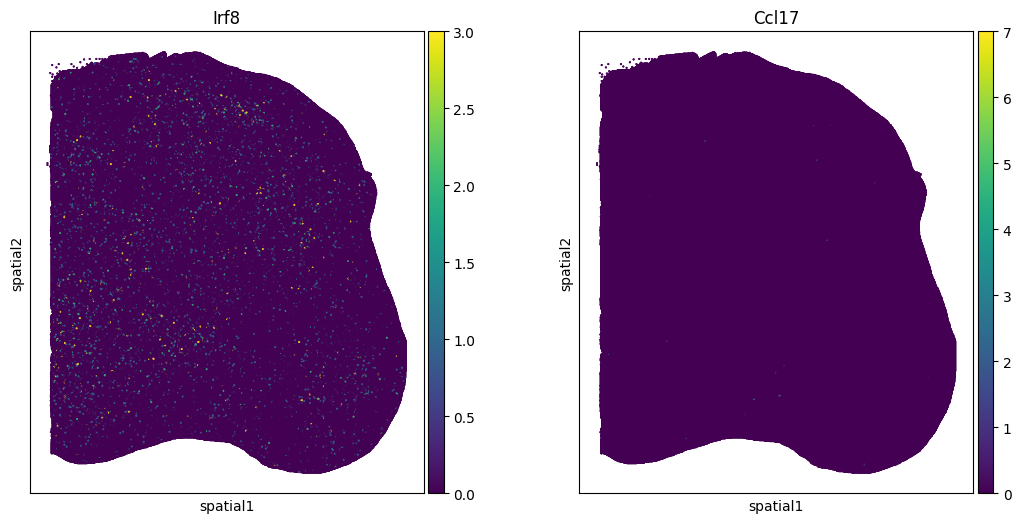

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(13, 6))
sq.pl.spatial_scatter(annotation[annotation.obs["marker"] == "2-1"], color="Irf8", shape=None, size=1, library_id="spatial", vmax=3, ax=ax[0])
sq.pl.spatial_scatter(annotation[annotation.obs["marker"] == "2-1"], color="Ccl17", shape=None, size=1, library_id="spatial", ax=ax[1])

In [11]:
from sklearn.metrics import pairwise_distances
r_dict = []
ligand = "Ccl19"
receptor = "Ccr7"
annotation_ = annotation[annotation.obs["marker"] == "2-1"]
ligand_coord = annotation_[annotation_[:, ligand].X > 0].obsm["spatial"]
receptor_coord = annotation_[annotation_[:, receptor].X > 0].obsm["spatial"]

distances = pairwise_distances(ligand_coord, receptor_coord)
close = distances < 120
for i in range(close.shape[1]):
    r_dict = r_dict + ligand_coord[close[:, i]].tolist()

In [12]:
np.array(r_dict)[:, 1]

array([  469,  1749, 17129,  5209,  2409,  2069,  5909,  2009, 12589,
        5209, 17129, 13869, 17129,  7369,  5909,  5769, 12589, 10169,
       10269, 14189, 17449, 17129, 11749,  4129, 11469,  6729, 12589,
       12589,  6729, 17129,  4129,  6229,  7889, 17789,  9189,  1749,
        5089, 10149, 12589,  4129])

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_color_utils.py:25: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


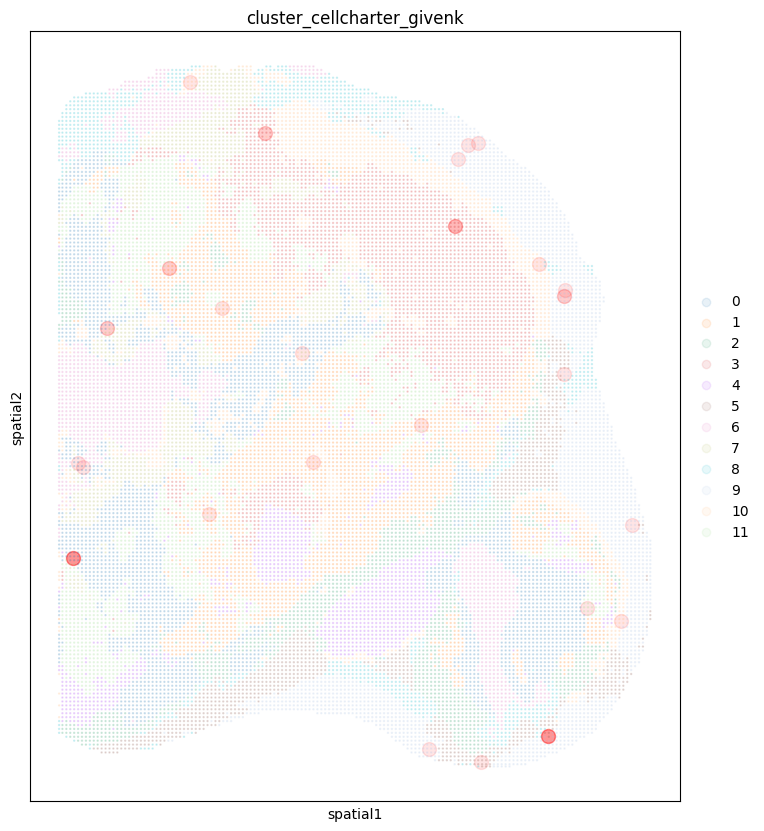

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
x = np.array(r_dict)[:, 0]
y = np.array(r_dict)[:, 1]
plt.scatter(x, y, s=100, alpha=0.1, color="Red")
sq.pl.spatial_scatter(fdata[fdata.obs["marker"] == "2-1"], color="cluster_cellcharter_givenk", size=2, shape=None, library_id="spatial", ax=ax, alpha=0.1)

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_color_utils.py:25: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


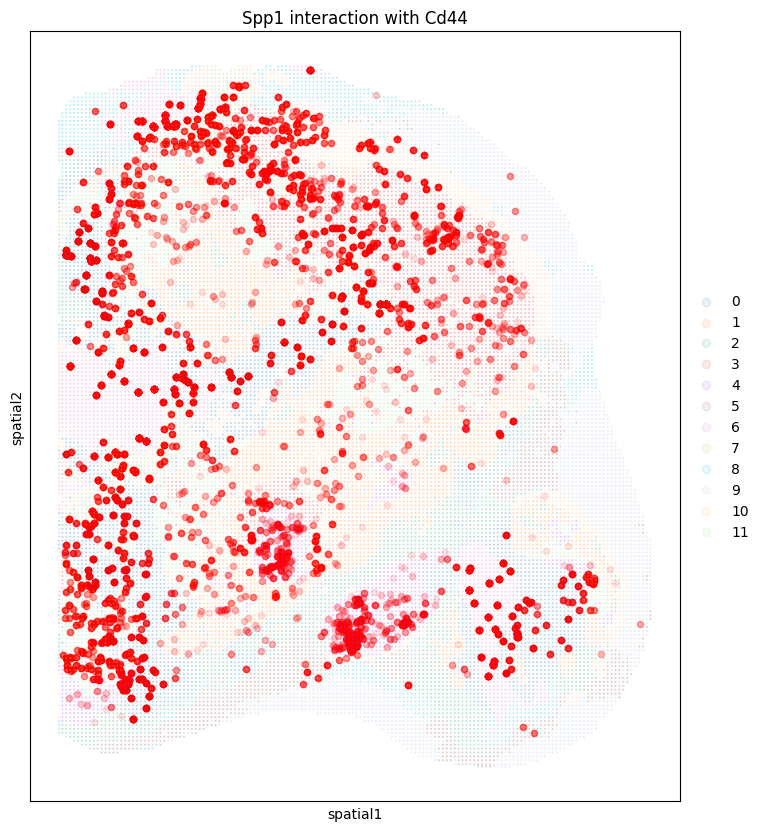

In [8]:
from sklearn.metrics import pairwise_distances
r_dict = []
ligand = "Spp1"
receptor = "Cd44"
annotation_ = annotation[annotation.obs["marker"] == "2-1"]
ligand_coord = annotation_[annotation_[:, ligand].X > 3].obsm["spatial"]
receptor_coord = annotation_[annotation_[:, receptor].X > 3].obsm["spatial"]

distances = pairwise_distances(ligand_coord, receptor_coord)
close = distances < 120
for i in range(close.shape[1]):
    r_dict = r_dict + ligand_coord[close[:, i]].tolist()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
x = np.array(r_dict)[:, 0]
y = np.array(r_dict)[:, 1]
plt.scatter(x, y, s=20, alpha=0.1, color="Red")
sq.pl.spatial_scatter(fdata[fdata.obs["marker"] == "2-1"], color="cluster_cellcharter_givenk", size=2, shape=None, library_id="spatial", ax=ax, alpha=0.1)
ax.set_title(f"{ligand} interaction with {receptor}")
plt.show()

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_color_utils.py:25: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


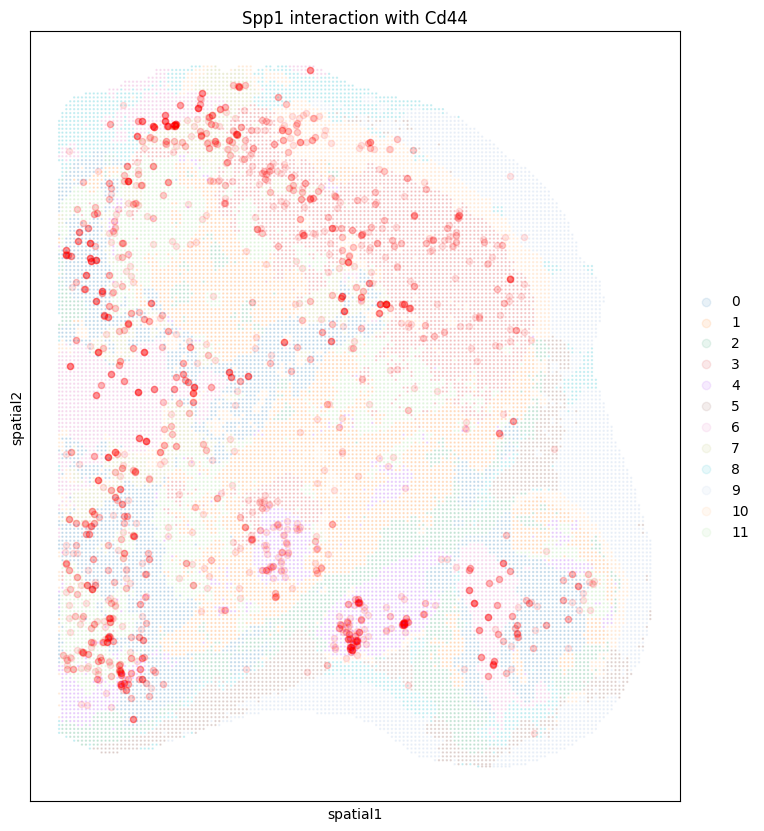

In [7]:
from sklearn.metrics import pairwise_distances
r_dict = []
ligand = "Spp1"
receptor = "Cd44"
annotation_ = annotation[annotation.obs["marker"] == "2-1"]
ligand_coord = annotation_[annotation_[:, ligand].X > 3].obsm["spatial"]
receptor_coord = annotation_[annotation_[:, receptor].X > 3].obsm["spatial"]

distances = pairwise_distances(ligand_coord, receptor_coord)
close = distances < 35
for i in range(close.shape[1]):
    r_dict = r_dict + ligand_coord[close[:, i]].tolist()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
x = np.array(r_dict)[:, 0]
y = np.array(r_dict)[:, 1]
plt.scatter(x, y, s=20, alpha=0.1, color="Red")
sq.pl.spatial_scatter(fdata[fdata.obs["marker"] == "2-1"], color="cluster_cellcharter_givenk", size=2, shape=None, library_id="spatial", ax=ax, alpha=0.1)
ax.set_title(f"{ligand} interaction with {receptor}")
plt.show()

In [7]:
fdata_ = fdata[fdata.obs["marker"] == '2-1'].copy()

In [8]:
annotation_ = annotation[annotation.obs["marker"] == '2-1'].copy()

In [9]:
annotation_.obs["cov"] = ["2-1_" + str(array[0] // 100 * 100) + '-' + str(array[1] // 100 * 100) for array in annotation_.obsm["spatial"]]
fdata_.obs["cov"] = ["2-1_" + str(array[0] // 100 * 100) + '-' + str(array[1] // 100 * 100) for array in fdata_.obsm["spatial"]]
annotation_.obs["cov"]

cov
2-1_10010-10009    2-1_10000-10000
2-1_10010-10029    2-1_10000-10000
2-1_10010-10049    2-1_10000-10000
2-1_10010-10069    2-1_10000-10000
2-1_10010-10089    2-1_10000-10000
                        ...       
2-1_9989-9909        2-1_9900-9900
2-1_9989-9929        2-1_9900-9900
2-1_9989-9949        2-1_9900-9900
2-1_9989-9969        2-1_9900-9900
2-1_9989-9989        2-1_9900-9900
Name: cov, Length: 567964, dtype: object

In [10]:
mapping = fdata_.obs[["cov", "cluster_cellcharter_givenk"]].set_index("cov").to_dict()['cluster_cellcharter_givenk']
annotation_.obs["cluster"] = annotation_.obs["cov"].map(mapping)
annotation_ = annotation_[~annotation_.obs["cluster"].isna()]

In [11]:
sq.gr.spatial_neighbors(annotation_, coord_type='generic', delaunay=True)

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/gr/_utils.py:193: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data


In [61]:
import typing

In [12]:
annotation_.obs["cluster"] = annotation_.obs["cluster"].astype('category')
# Compute interaction graphs
sq.gr.interaction_matrix(annotation_, "cluster")

# Calculate neighborhood enrichment using permutation tests
sq.gr.nhood_enrichment(annotation_, "cluster")

  0%|          | 0/1000 [00:00<?, ?/s]

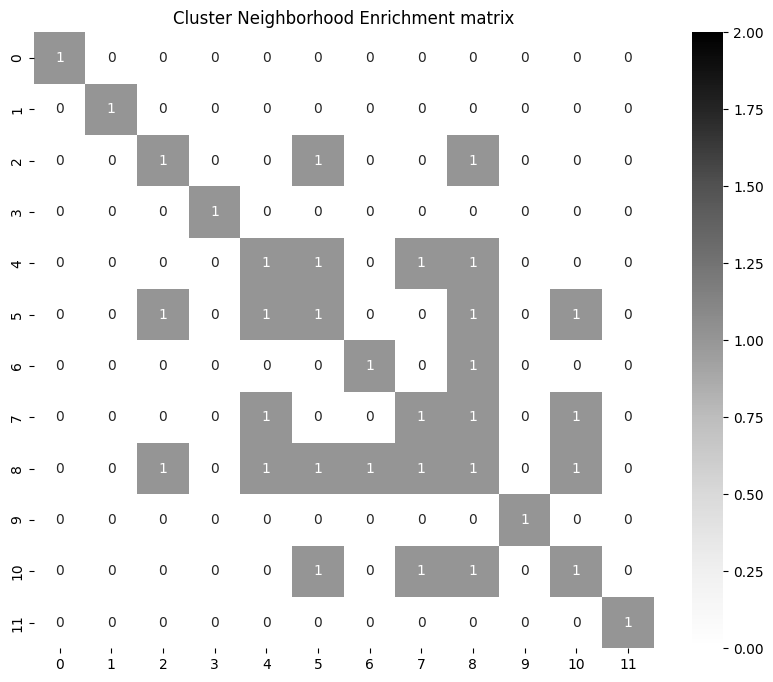

In [13]:
# Extract the neighborhood enrichment matrix
enrichment_matrix = annotation_.uns['cluster_nhood_enrichment']['count']

# Binarize the matrix
zscores = annotation_.uns['cluster_nhood_enrichment']['zscore']
relative_enrichment = enrichment_matrix > 0
significant_enrichment = (zscores > np.quantile(zscores, 0.75)) & relative_enrichment

# Create a binary enrichment matrix
binary_enrichment_matrix = np.where(significant_enrichment, 1, 0)

# Optionally, save or further process the binary enrichment matrix
np.save('binary_enrichment_matrix.npy', binary_enrichment_matrix)

# Visualize or analyze the binary enrichment matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(binary_enrichment_matrix, annot=True, cmap='Greys', vmax=2)
plt.title('Cluster Neighborhood Enrichment matrix')
plt.show()

In [82]:
sq.gr.interaction_matrix(annotation_, "annotations")
sq.gr.nhood_enrichment(annotation_, "annotations")

  0%|          | 0/1000 [00:00<?, ?/s]

KeyError: 'annotations_nhood_enrichment'

In [90]:
np.unique(annotation_.obs["annotations"])

array(['DC', 'Endothelial', 'Epithelial', 'Fibroblast', 'Macrophages',
       'Malignant', 'MuscleCell', 'NK', 'Others', 'Unknown T',
       'effector T', 'exhausted T', 'memory T', 'stem-like T'],
      dtype=object)

In [29]:
annotation_.obs["Cd44_T"] = annotation_.obs["annotations"].tolist()
annotation_.obs["Cd44_T"][np.array(annotation_.obs["annotations"].str.endswith("T")).flatten()] = 'Others_T'
annotation_.obs["Cd44_T"][np.array(annotation_[:, "Cd44"].X.toarray() > 3).flatten() & np.array(annotation_.obs["annotations"].str.endswith("T")).flatten()] = 'Cd44_T'

/tmp/ipykernel_5391/2105659297.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  annotation_.obs["Cd44_T"][np.array(annotation_.obs["annotations"].str.endswith("T")).flatten()] = 'Others_T'
/tmp/ipykernel_5391/2105659297.py:2: SettingWithC

In [30]:
annotation_.obs["Cd44_T"].value_counts()

Cd44_T
Macrophages    235275
Malignant       96460
Fibroblast      66918
Others_T        52222
Others          32568
MuscleCell      30721
DC              21568
Endothelial     15268
NK              10823
Cd44_T           5932
Epithelial        209
Name: count, dtype: int64

In [36]:
field_name = "Cd44_T"
annotation_.obs[field_name] = annotation_.obs[field_name].astype('category')
sq.gr.interaction_matrix(annotation_, field_name)
sq.gr.nhood_enrichment(annotation_, field_name)
enrichment_matrix = annotation_.uns[f"{field_name}_nhood_enrichment"]['count']

  0%|          | 0/1000 [00:00<?, ?/s]

ValueError: Shape of passed values is (11, 11), indices imply (14, 14)

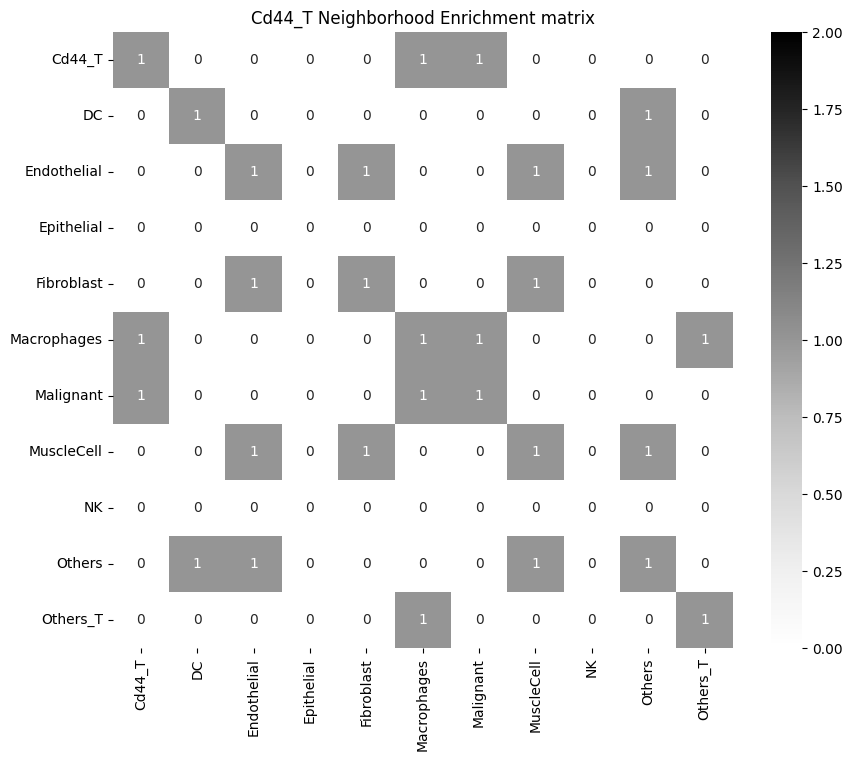

In [37]:
zscores = annotation_.uns[f"{field_name}_nhood_enrichment"]['zscore']
relative_enrichment = enrichment_matrix > 0
significant_enrichment = (zscores > np.quantile(zscores, 0.75)) & relative_enrichment

binary_enrichment_matrix = np.where(significant_enrichment, 1, 0)
cluster_names = annotation_.obs[f"{field_name}"].cat.categories
binary_enrichment_df = pd.DataFrame(binary_enrichment_matrix, 
                                    index=cluster_names, 
                                    columns=cluster_names)

plt.figure(figsize=(10, 8))
sns.heatmap(binary_enrichment_df, annot=True, cmap='Greys', vmax=2)
plt.title(f"{field_name} Neighborhood Enrichment matrix")
plt.show()

In [41]:
np.triu?

Signature:       np.triu(m, k=0)
Call signature:  np.triu(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function triu at 0x7f71405c8a40>
File:            ~/miniconda3/envs/scanpy/lib/python3.12/site-packages/numpy/lib/twodim_base.py
Docstring:      
Upper triangle of an array.

Return a copy of an array with the elements below the `k`-th diagonal
zeroed. For arrays with ``ndim`` exceeding 2, `triu` will apply to the
final two axes.

Please refer to the documentation for `tril` for further details.

See Also
--------
tril : lower triangle of an array

Examples
--------
>>> np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 0,  8,  9],
       [ 0,  0, 12]])

>>> np.triu(np.arange(3*4*5).reshape(3, 4, 5))
array([[[ 0,  1,  2,  3,  4],
        [ 0,  6,  7,  8,  9],
        [ 0,  0, 12, 13, 14],
        [ 0,  0,  0, 18, 19]],
       [[20, 21, 22, 23, 24],
        [ 0, 26, 27, 28, 29],
        [ 0,  0, 32, 33, 3

In [1]:
# Assuming annotation_, field_name, enrichment_matrix are already defined
zscores = annotation_.uns[f"{field_name}_nhood_enrichment"]['zscore']
relative_enrichment = enrichment_matrix > 0
significant_enrichment = (zscores > np.quantile(zscores, 0.75)) & relative_enrichment

binary_enrichment_matrix = np.where(significant_enrichment, 1, 0)
cluster_names = annotation_.obs[f"{field_name}"].cat.categories
binary_enrichment_df = pd.DataFrame(binary_enrichment_matrix, 
                                    index=cluster_names, 
                                    columns=cluster_names)

# Mask for the upper triangle
mask = np.triu(np.ones_like(binary_enrichment_df, dtype=bool))

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(binary_enrichment_df, mask=mask, annot=False, cmap='Greys', vmax=2, cbar=False, ax=ax)

s = len(cluster_names)
for i in range(s):
    for j in range(i):
        if binary_enrichment_df.iloc[i, j] == 1:
            # Draw vertical line from cell to x-axis
            ax.plot([j + 0.5, j + 0.5], [i+0.5, s], color='black', lw=3)
            # Draw horizontal line from cell to y-axis
            ax.plot([0, j+0.5], [i + 0.5, i + 0.5], color='black', lw=3)
# ax.plot([s, 0], [s, 0], color='black', lw=1)
# ax.plot([0, 0], [s, 0], color='black', lw=1)
# ax.plot([0, s], [s, s], color='black', lw=2)

ax.set_title(f"{field_name} Neighborhood Enrichment Matrix", rotation=0)
plt.show()

NameError: name 'annotation_' is not defined

In [140]:
# Assuming annotation_, field_name, and enrichment_matrix are already defined
zscores = annotation_.uns[f"{field_name}_nhood_enrichment"]['zscore']
relative_enrichment = enrichment_matrix > 0
significant_enrichment = (zscores > np.quantile(zscores, 0.75)) & relative_enrichment

binary_enrichment_matrix = np.where(significant_enrichment, 1, 0)
cluster_names = annotation_.obs[f"{field_name}"].cat.categories
binary_enrichment_df = pd.DataFrame(binary_enrichment_matrix, 
                                    index=cluster_names, 
                                    columns=cluster_names)

# Mask for the upper triangle
mask = np.triu(np.ones_like(binary_enrichment_df, dtype=bool))

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(binary_enrichment_df, mask=mask, annot=False, cmap='Greys', vmax=2, cbar=False, ax=ax)

s = len(cluster_names)
for i in range(s):
    for j in range(i):
        if binary_enrichment_df.iloc[i, j] == 1:
            # Draw vertical line from cell to x-axis
            ax.plot([j + 0.5, j + 0.5], [i + 0.5, s], color='black', lw=3)
            # Draw horizontal line from cell to y-axis
            ax.plot([0, j + 0.5], [i + 0.5, i + 0.5], color='black', lw=3)

ax.plot([s, 0], [s, 0], color='black', lw=1)
ax.plot([0, 0], [s, 0], color='black', lw=1)
ax.plot([0, s], [s, s], color='black', lw=2)

# Rotate the plot 135 degrees
plt.gca().set_aspect('equal', adjustable='box')
fig.canvas.draw()
plt.gca().invert_yaxis()
t = ax.transData.transform
tinv = ax.transData.inverted().transform
quad = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
rot = np.array([[np.cos(np.pi/4), np.sin(np.pi/4)], [-np.sin(np.pi/4), np.cos(np.pi/4)]])
for spine in ax.spines.values():
    spine.set_transform(ax.transData + ax.transAxes + plt.matplotlib.transforms.Affine2D(rot))

plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.draw()

# Set the title below the plot
plt.gca().set_title(f"{field_name} Neighborhood Enrichment Matrix", rotation=0)
plt.subplots_adjust(bottom=0.15)
fig.suptitle(f"{field_name} Neighborhood Enrichment Matrix", y=-0.02, fontsize=16)

plt.show()

ValueError: shapes (2,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)

ValueError: shapes (2,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)

<Figure size 800x800 with 1 Axes>

In [ ]:
annotation_.obs["cluster"] = annotation_.obs["cluster"].astype('category')
# Compute interaction graphs
sq.gr.interaction_matrix(annotation_, "cluster")

# Calculate neighborhood enrichment using permutation tests
sq.gr.nhood_enrichment(annotation_, "cluster")

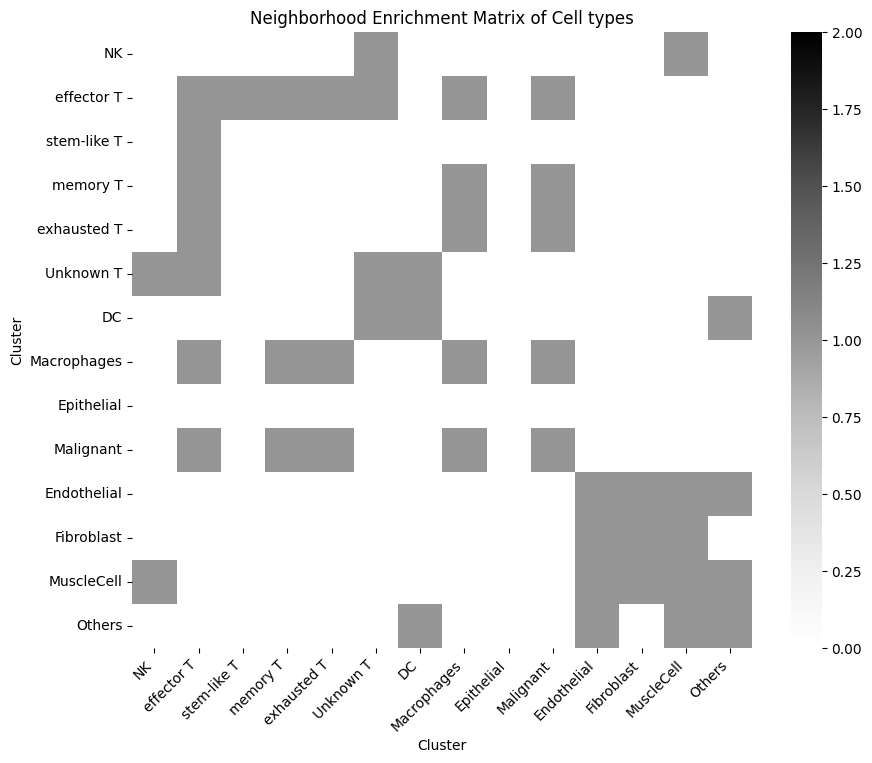

In [109]:
enrichment_matrix = annotation_.uns['annotations_nhood_enrichment']['count']

# Binarize the matrix
zscores = annotation_.uns['annotations_nhood_enrichment']['zscore']
relative_enrichment = enrichment_matrix > 0
significant_enrichment = (zscores > np.quantile(zscores, 0.75)) & relative_enrichment

# Create a binary enrichment matrix
binary_enrichment_matrix = np.where(significant_enrichment, 1, 0)
cluster_names = annotation_.obs["annotations"].cat.categories
binary_enrichment_df = pd.DataFrame(binary_enrichment_matrix, 
                                    index=cluster_names, 
                                    columns=cluster_names)

plt.figure(figsize=(10, 8))
sns.heatmap(binary_enrichment_df, annot=False, cmap='Greys', vmax=2)
plt.title('Neighborhood Enrichment Matrix of Cell types')
plt.xlabel('Cluster')
plt.ylabel('Cluster')
plt.xticks(rotation=45, ha='right')  # 旋转 x 轴标签
plt.yticks(rotation=0)  # 保持 y 轴标签的垂直方向+
plt.show()

In [110]:
annotation_ = annotation[annotation.obs["marker"] == "2-1"].copy()
annotation_guide_ = annotation_guide[annotation_guide.obs["marker"] == '2-1'].copy()

In [121]:
annotation_guide_ = utils.combine_guide_replicates(annotation_guide_)

/home/wpy/stereoseq/20240502-SPACseq/bin/utils.py:78: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()


In [137]:
annotation_guide_.obs["guide"] = annotation_guide_.X.argmax(axis=1)

name_map = pd.DataFrame(annotation_guide_.var_names).to_dict()[0]
annotation_guide_.obs["guide"] = annotation_guide_.obs["guide"].map(name_map)
annotation_guide_.obs["guide"][annotation_guide_.X.max(axis=1) == 0] = "None"
annotation_guide_.obs["guide"] = annotation_guide_.obs["guide"].astype("category")

/tmp/ipykernel_75391/217834188.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  annotation_guide_.obs["guide"][annotation_guide_.X.max(axis=1) == 0] = "None"
/tmp/ipykernel_75391/217834188.py:5: SettingWithCopyWarning: 
A value is trying 

In [140]:
sq.gr.spatial_neighbors(annotation_guide_, coord_type='generic', delaunay=True)
sq.gr.interaction_matrix(annotation_guide_, "guide")
sq.gr.nhood_enrichment(annotation_guide_, "guide")

  0%|          | 0/1000 [00:00<?, ?/s]

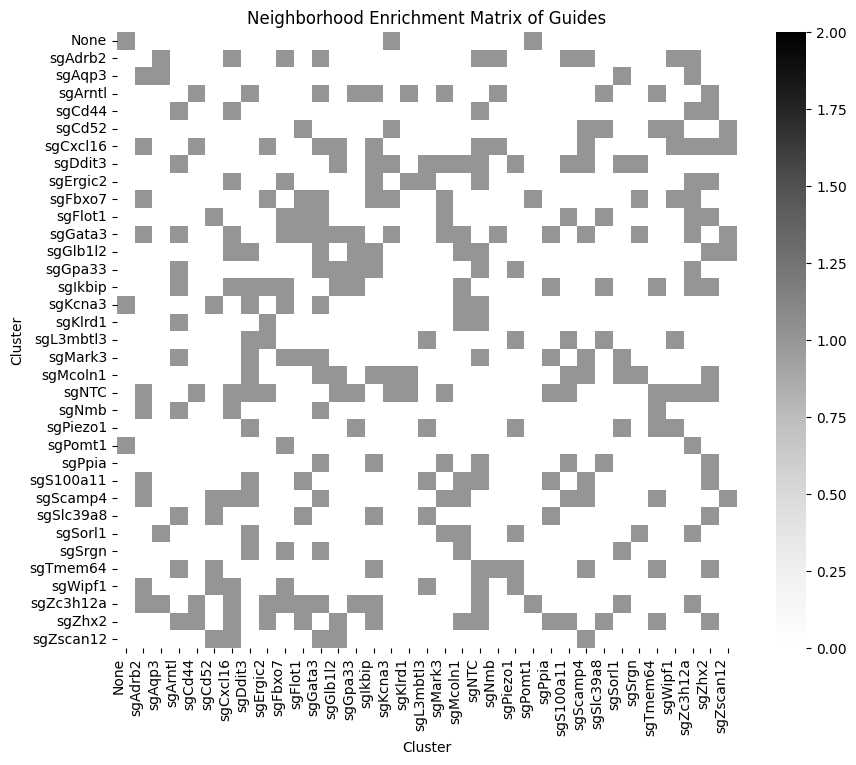

In [147]:
enrichment_matrix = annotation_guide_.uns['guide_nhood_enrichment']['count']

# Binarize the matrix
zscores = annotation_guide_.uns['guide_nhood_enrichment']['zscore']
relative_enrichment = enrichment_matrix > 0
significant_enrichment = (zscores > np.quantile(zscores, 0.75)) & relative_enrichment

# Create a binary enrichment matrix
binary_enrichment_matrix = np.where(significant_enrichment, 1, 0)
cluster_names = annotation_guide_.obs["guide"].cat.categories
binary_enrichment_df = pd.DataFrame(binary_enrichment_matrix, 
                                    index=cluster_names, 
                                    columns=cluster_names)

plt.figure(figsize=(10, 8))
sns.heatmap(binary_enrichment_df, annot=False, cmap='Greys', vmax=2)
plt.title('Neighborhood Enrichment Matrix of Guides')
plt.xlabel('Cluster')
plt.ylabel('Cluster')
plt.xticks(rotation=90, ha='right')  # 旋转 x 轴标签
plt.yticks(rotation=0)  # 保持 y 轴标签的垂直方向+
plt.show()

In [154]:
annotation_guide_.obs["annotations"] = annotation_.obs["annotations"].tolist()

In [210]:
t_annotation = annotation_guide_[annotation_guide_.obs["annotations"].str.endswith("T") | (annotation_guide_.obs["annotations"] == "Macrophages")]

In [211]:
t_annotation

View of AnnData object with n_obs × n_vars = 293429 × 34
    obs: 'marker', 'cov', 'guide', 'annotations'
    uns: 'spatial_neighbors', 'guide_interactions', 'guide_nhood_enrichment'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [227]:
t_annotation.obs["tm_guide"] = [guide if annot != "Macrophages" else "Macrophages" for guide, annot in zip(t_annotation.obs["guide"], t_annotation.obs["annotations"])]
t_annotation.obs["tm_guide"] = t_annotation.obs["tm_guide"].astype("category")

In [228]:
#sq.gr.spatial_neighbors(t_annotation, coord_type='generic', delaunay=True)
sq.gr.interaction_matrix(t_annotation, "tm_guide")
sq.gr.nhood_enrichment(t_annotation, "tm_guide")

  0%|          | 0/1000 [00:00<?, ?/s]

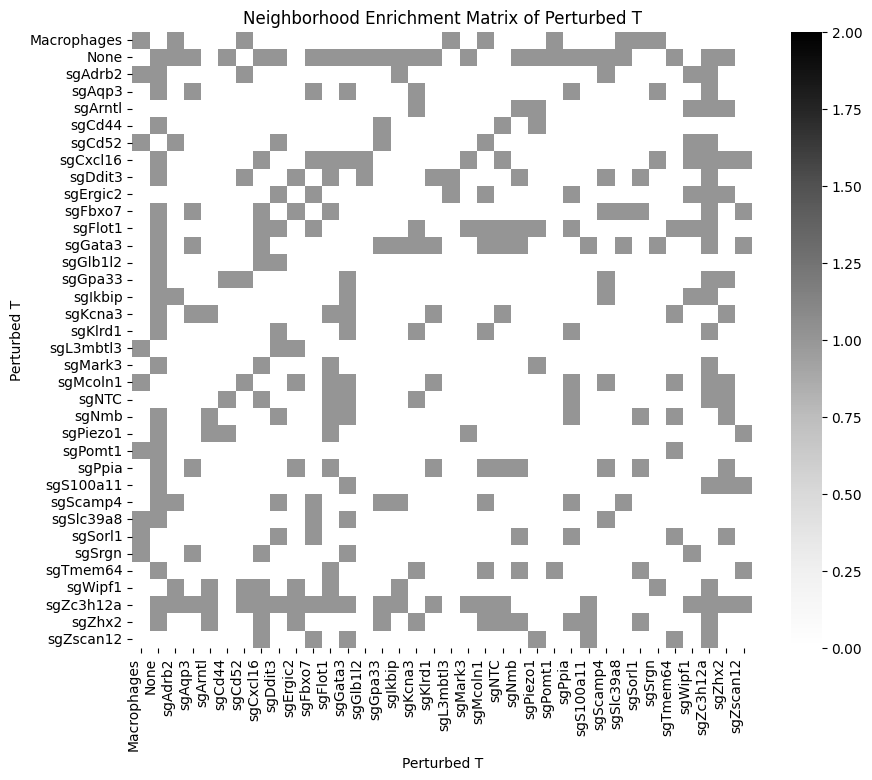

In [229]:
enrichment_matrix = t_annotation.uns['tm_guide_nhood_enrichment']['count']

# Binarize the matrix
zscores = t_annotation.uns['tm_guide_nhood_enrichment']['zscore']
relative_enrichment = enrichment_matrix > 0
significant_enrichment = (zscores > np.quantile(zscores, 0.75)) & relative_enrichment

# Create a binary enrichment matrix
binary_enrichment_matrix = np.where(significant_enrichment, 1, 0)
cluster_names = t_annotation.obs["tm_guide"].cat.categories
binary_enrichment_df = pd.DataFrame(binary_enrichment_matrix, 
                                    index=cluster_names, 
                                    columns=cluster_names)

plt.figure(figsize=(10, 8))
sns.heatmap(binary_enrichment_df, annot=False, cmap='Greys', vmax=2)
plt.title('Neighborhood Enrichment Matrix of Perturbed T')
plt.xlabel('Perturbed T')
plt.ylabel('Perturbed T')
plt.xticks(rotation=90, ha='right')  # 旋转 x 轴标签
plt.yticks(rotation=0)  # 保持 y 轴标签的垂直方向+
plt.show()

In [167]:
annotation_.var_names[annotation_.var_names.str.startswith("Ti")]

Index(['Tia1', 'Tiam1', 'Tiam2', 'Ticam1', 'Ticam2', 'Ticrr', 'Tie1', 'Tifa',
       'Tifab', 'Tigar', 'Tigd3', 'Tigd5', 'Tigit', 'Timd4', 'Timeless',
       'Timm17a', 'Timm29', 'Timm8a1', 'Timp1', 'Timp2', 'Timp3', 'Timp4',
       'Tinag', 'Tinagl1', 'Tinf2', 'Tiparp', 'Tipin', 'Tirap'],
      dtype='object')

In [168]:
lr_pairs = [
    ("Ccl21", "Ccr7"),
    ("Ccl21", "Ccr4"),
    ("Ccl17", "Ccr4"),
    ("Ccl2", "Ccr2"),
    ("Cxcl9", "Cxcr3"),
    ("Cxcl10", "Cxcr3"),
    ("Cxcl11", "Cxcr3"),
    ("Cxcl12", "Cxcr4"),
    ("Ccl3", "Ccr1"),
    ("Ccl3", "Ccr5"),
    ("Ccl4", "Ccr1"),
    ('Ccl4', "Ccr5"),
    ("Ccl5", "Ccr1"),
    ("Ccl5", "Ccr5"),
    ("Cxcl16", "Cxcr6"),
    ("Cd274", "Pd1"),
    ("Pdcd1", "Pd1"),
    ("Tnfsf10", "Tnfrsf1a"),
    ("Spp1", "Cd44"),
    ("Cd44", "Tiam1")
]

In [169]:
for pair in lr_pairs:
    if pair[0] in annotation_.var_names and pair[1] in annotation_.var_names:
        print(pair)

('Ccl17', 'Ccr4')
('Ccl2', 'Ccr2')
('Cxcl9', 'Cxcr3')
('Cxcl10', 'Cxcr3')
('Cxcl12', 'Cxcr4')
('Ccl3', 'Ccr1')
('Ccl3', 'Ccr5')
('Ccl4', 'Ccr1')
('Ccl4', 'Ccr5')
('Ccl5', 'Ccr1')
('Ccl5', 'Ccr5')
('Cxcl16', 'Cxcr6')
('Tnfsf10', 'Tnfrsf1a')
('Spp1', 'Cd44')
('Cd44', 'Tiam1')


In [178]:
lrs = list(set([lr[0] for lr in lr_pairs if lr[0] in annotation_.var_names] + [lr[1] for lr in lr_pairs if lr[1] in annotation_.var_names]))

In [187]:
annotation_.obs["lr"] = annotation_[:, lrs].X.toarray().argmax(axis=1).tolist()
name_map = pd.DataFrame(lrs).to_dict()[0]
annotation_.obs["lr"] = annotation_.obs["lr"].map(name_map)
annotation_.obs["lr"][annotation_[:, lrs].X.toarray().max(axis=1) == 0] = "None"
annotation_.obs["lr"] = annotation_.obs["lr"].astype('category')

/tmp/ipykernel_75391/1024335839.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  annotation_.obs["lr"][annotation_[:, lrs].X.toarray().max(axis=1) == 0] = "None"
/tmp/ipykernel_75391/1024335839.py:4: SettingWithCopyWarning: 
A value is tr

In [188]:
annotation_.obs

,marker,annotations,cov,cluster,lr
cov,,,,,
2-1_10010-10009,2-1,Macrophages,2-1_10010-10009,2.0,None
2-1_10010-10029,2-1,Macrophages,2-1_10010-10029,2.0,None
2-1_10010-10049,2-1,Macrophages,2-1_10010-10049,2.0,Ccl5
2-1_10010-10069,2-1,Endothelial,2-1_10010-10069,2.0,Cd44
2-1_10010-10089,2-1,Macrophages,2-1_10010-10089,2.0,None
...,...,...,...,...,...
2-1_9989-9909,2-1,Fibroblast,2-1_9989-9909,2.0,None
2-1_9989-9929,2-1,Macrophages,2-1_9989-9929,2.0,None
2-1_9989-9949,2-1,Others,2-1_9989-9949,2.0,None


In [190]:
sq.gr.spatial_neighbors(annotation_, coord_type='generic', delaunay=True)
sq.gr.interaction_matrix(annotation_, "lr")
sq.gr.nhood_enrichment(annotation_, "lr")

  0%|          | 0/1000 [00:00<?, ?/s]

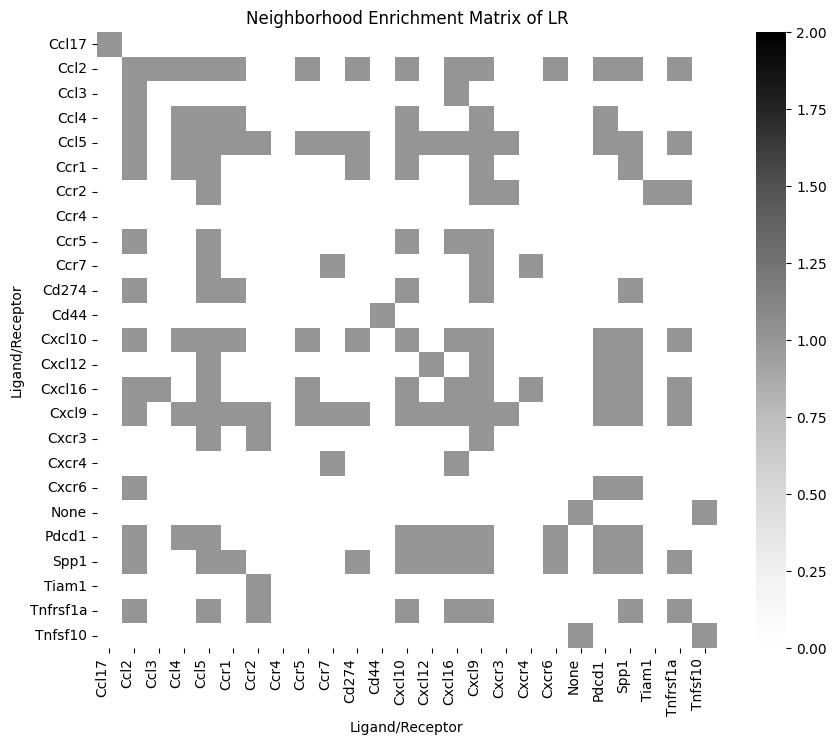

In [200]:
enrichment_matrix = annotation_.uns['lr_nhood_enrichment']['count']

# Binarize the matrix
zscores = annotation_.uns['lr_nhood_enrichment']['zscore']
relative_enrichment = enrichment_matrix > 0
significant_enrichment = (zscores > np.quantile(zscores, 0.75)) & relative_enrichment

# Create a binary enrichment matrix
binary_enrichment_matrix = np.where(significant_enrichment, 1, 0)
cluster_names = annotation_.obs["lr"].cat.categories
binary_enrichment_df = pd.DataFrame(binary_enrichment_matrix, 
                                    index=cluster_names, 
                                    columns=cluster_names)

plt.figure(figsize=(10, 8))
sns.heatmap(binary_enrichment_df, annot=False, cmap='Greys', vmax=2)
plt.title('Neighborhood Enrichment Matrix of LR')
plt.xlabel('Ligand/Receptor')
plt.ylabel('Ligand/Receptor')
plt.xticks(rotation=90, ha='right')  # 旋转 x 轴标签
plt.yticks(rotation=0)  # 保持 y 轴标签的垂直方向+
plt.show()

In [192]:
lr_annotation = annotation_[annotation_.obs["lr"] != "None"].copy()
sq.gr.spatial_neighbors(lr_annotation, coord_type='generic', delaunay=True)
sq.gr.interaction_matrix(lr_annotation, "lr")
sq.gr.nhood_enrichment(lr_annotation, "lr")

  0%|          | 0/1000 [00:00<?, ?/s]

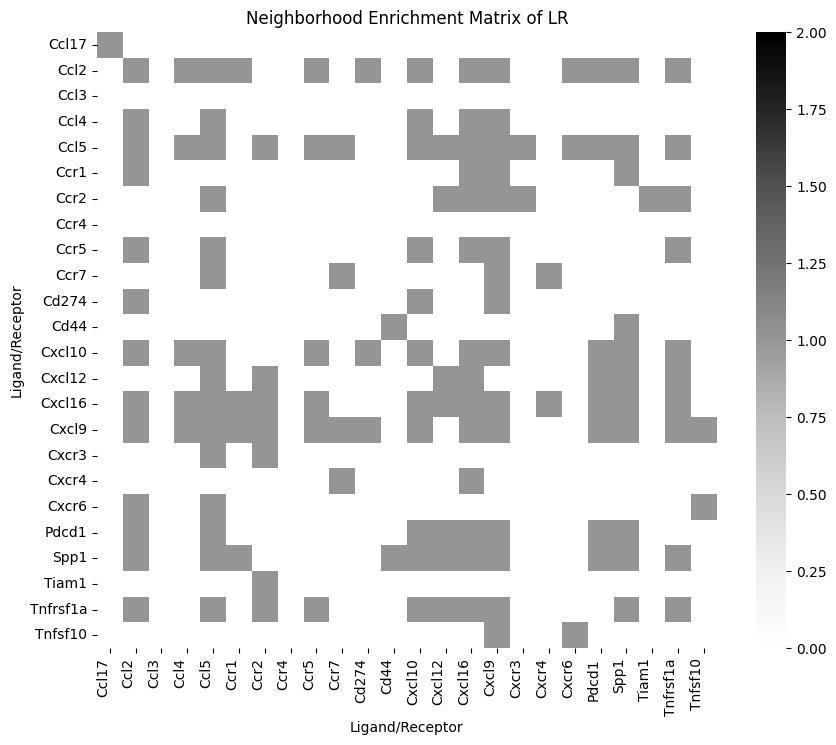

In [199]:
enrichment_matrix = lr_annotation.uns['lr_nhood_enrichment']['count']

# Binarize the matrix
zscores = lr_annotation.uns['lr_nhood_enrichment']['zscore']
relative_enrichment = enrichment_matrix > 0
significant_enrichment = (zscores > np.quantile(zscores, 0.75)) & relative_enrichment

# Create a binary enrichment matrix
binary_enrichment_matrix = np.where(significant_enrichment, 1, 0)
cluster_names = lr_annotation.obs["lr"].cat.categories
binary_enrichment_df = pd.DataFrame(binary_enrichment_matrix, 
                                    index=cluster_names, 
                                    columns=cluster_names)
binary_enrichment_df.loc["Cd44", "Spp1"] = 1
binary_enrichment_df.loc["Spp1", "Cd44"] = 1

plt.figure(figsize=(10, 8))
sns.heatmap(binary_enrichment_df, annot=False, cmap='Greys', vmax=2)
plt.title('Neighborhood Enrichment Matrix of LR')
plt.xlabel('Ligand/Receptor')
plt.ylabel('Ligand/Receptor')
plt.xticks(rotation=90, ha='right')  # 旋转 x 轴标签
plt.yticks(rotation=0)  # 保持 y 轴标签的垂直方向+
plt.show()

# Collagen

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_color_utils.py:25: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


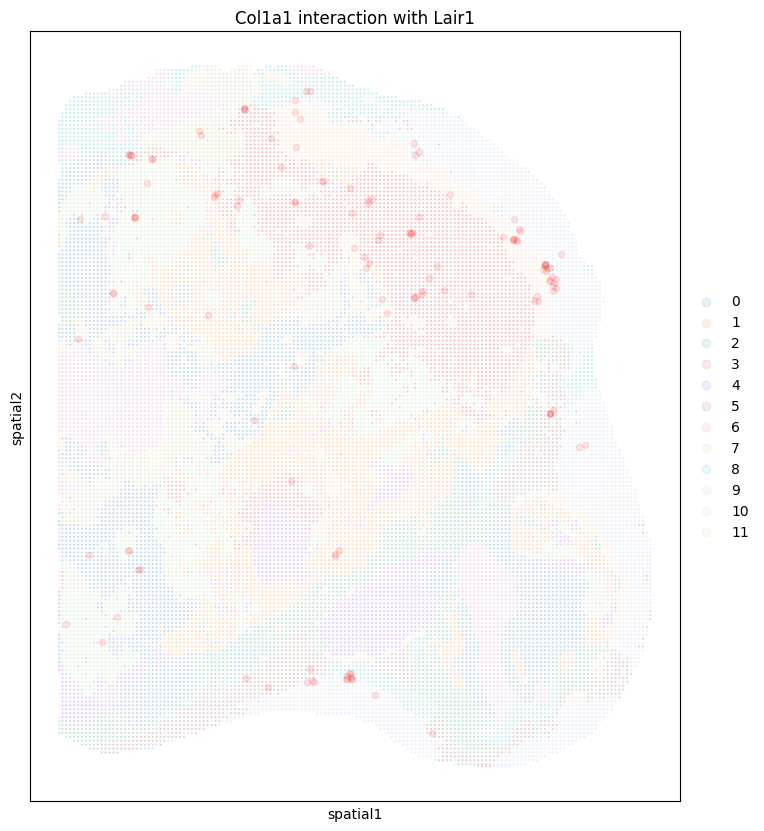

In [44]:
from sklearn.metrics import pairwise_distances
r_dict = []
ligand = "Col1a1"
receptor = "Lair1"
annotation_ = annotation[annotation.obs["marker"] == "2-1"]
ligand_coord = annotation_[annotation_[:, ligand].X > 3].obsm["spatial"]
receptor_coord = annotation_[annotation_[:, receptor].X > 3].obsm["spatial"]

distances = pairwise_distances(ligand_coord, receptor_coord)
close = distances < 120
for i in range(close.shape[1]):
    r_dict = r_dict + ligand_coord[close[:, i]].tolist()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
x = np.array(r_dict)[:, 0]
y = np.array(r_dict)[:, 1]
plt.scatter(x, y, s=20, alpha=0.1, color="Red")
sq.pl.spatial_scatter(fdata[fdata.obs["marker"] == "2-1"], color="cluster_cellcharter_givenk", size=2, shape=None, library_id="spatial", ax=ax, alpha=0.1)
ax.set_title(f"{ligand} interaction with {receptor}")
plt.show()

# L-R specify celltype

In [42]:
annotation_.var_names[annotation_.var_names.str.startswith("")]

Index(['Lair1'], dtype='object')

In [38]:
T_receptors = {
    "activate": ["Ccl17", "Ccl2", "Cxcl9", "Cxcl10", "Cxcl12", "Ccl3", "Ccl4", "Ccl5", "Cxcl16"],
    "suppress": ["Ido1", "Cd274", "Pdcd1lg2", "Tnfsf10", "Vtcn1", "Il10", "Tgfb1", "Tgfb2", "Ptgs2", "Ptges", "Lgals9", "Ccl22", "Cd80", "Cd86"]
}
T_ligand = ["Ccr7", "Ccr4", "Ccr2", "Cxcr3", "Cxcr4", "Ccr1", "Ccr5", "Cxcr6"]

In [40]:
for key in T_receptors:
    for value in T_receptors[key]:
        if value not in annotation_.var_names: print(value)

In [41]:
receptor = "Ccl17"
ligand = "Ccr4"
annotation_.obs["lr_type"] = "Unknown"
annotation_.obs["lr_type"][annotation_.obs["marker"].str.endswith("T")] = "Others T"
annotation_.obs["lr_type"][annotation_.obs["marker"].str.endswith("T") & (annotation_[:, receptor].X > 0).flatten()] = f"{receptor}+ T"
annotation_.obs["lr_type"][annotation_.obs[]]

,marker,annotations,cov,cluster
cov,,,,
2-1_10010-10009,2-1,Macrophages,2-1_10000-10000,2
2-1_10010-10029,2-1,Macrophages,2-1_10000-10000,2
2-1_10010-10049,2-1,Macrophages,2-1_10000-10000,2
2-1_10010-10069,2-1,Endothelial,2-1_10000-10000,2
2-1_10010-10089,2-1,Macrophages,2-1_10000-10000,2
...,...,...,...,...
2-1_9989-9909,2-1,Fibroblast,2-1_9900-9900,2
2-1_9989-9929,2-1,Macrophages,2-1_9900-9900,2
2-1_9989-9949,2-1,Others,2-1_9900-9900,2
